In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
import txt_mixin

In [3]:
plt.rcParams['font.size'] = 14

In [4]:
import py_block_diagram

In [59]:
import importlib

In [60]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/Users/kraussry/git/py_block_diagram/py_block_diagram/__init__.py'>

In [61]:
import py_block_diagram as pybd

## System Description

In [62]:
U = pybd.int_constant_block(0,"U_cl")

in block.__init__
in block.__init__, self.param_list = ['value']


In [63]:
U.place_absolute(0,0)

In [64]:
sum1 = pybd.summing_junction()

in block.__init__
in block.__init__, self.param_list = []
in block_with_two_inputs.__init__, kwargs = {'param_list': [], 'default_params': {}}


In [65]:
sum1.place_relative(U,"right")

In [66]:
sum1.set_input_block1(U)

In [67]:
D = pybd.PD_controller(3,0.1)

in block.__init__
in block.__init__, self.param_list = ['Kp', 'Kd']


In [68]:
D.place_relative(sum1,"right")

In [69]:
D.set_input_block1(sum1)

In [70]:
diff_motors = pybd.custom_actuator("dual_motors","two_motors_actuator","&motors")

In [71]:
pend_enc = pybd.custom_sensor("pend_enc","pendulum_encoder","")

In [72]:
G = pybd.plant(pend_enc,diff_motors,"Robot")

in block.__init__
in block.__init__, self.param_list = ['actuator_name', 'sensor_name']


In [73]:
if1 = pybd.if_block()

in block.__init__
in block.__init__, self.param_list = []
in block_with_two_inputs.__init__, kwargs = {'param_list': [], 'default_params': {}}


In [74]:
const2 = pybd.int_constant_block(0, "const2")

in block.__init__
in block.__init__, self.param_list = ['value']


In [75]:
sat = pybd.saturation_block()

in block.__init__
in block.__init__, self.param_list = []


In [76]:
sat.set_input_block1(D)

In [77]:
sat.place_relative(D, "right")

In [78]:
if1.place_relative(sat, "right")

In [79]:
if1.width = 3

In [80]:
G.place_relative(if1,"right",5)

In [81]:
const2.place_relative(if1, "below", 2, xshift=-3)

In [82]:
G.set_input_block1(if1)

In [83]:
Y = pybd.output_block("encoder",G)

in block.__init__
in block.__init__, self.param_list = []


In [84]:
Y.place_relative(G, "right",6)

In [85]:
Y.width = 4

In [86]:
sum1.set_input_block2(G)

In [87]:
gt1 = pybd.greater_than_block()

in block.__init__
in block.__init__, self.param_list = []
in block_with_two_inputs.__init__, kwargs = {'param_list': [], 'default_params': {}}


In [88]:
gt1.place_relative(if1, "above", 5, xshift=-5)

In [89]:
lc = pybd.loop_count_block()

in block.__init__
in block.__init__, self.param_list = []


In [90]:
lc.width = 5

In [91]:
const1 = pybd.int_constant_block(500,'const1')

in block.__init__
in block.__init__, self.param_list = ['value']


In [92]:
lc.place_relative(gt1,"left",yshift=2)

In [93]:
const1.place_relative(gt1,"left", yshift=-2)

In [94]:
gt1.set_inputs(lc, const1)

In [95]:
if1.set_inputs(gt1, sat, const2)

In [96]:
block_list = [U,sum1, D, sat, if1, const2, gt1, const1, lc, G, Y]

### System Creation

The approach for creating a `block_diagram` system has changed since this notebook was created.  Passing in a list of blocks is not really supported anymore:

```
class block_diagram(object):
    def __init__(self, block_name_list=[], block_dict={}, block_list=[], axis=None, \
                 dt=0.004, \
                 welcome_msg="auto-generated Arduino code", \
                 fontdict={'size': 16, 'family':'serif'}, \
                 actuators_dict={}, \
                 actuator_name_list=[], \
                 sensors_dict={}, \
                 sensor_name_list=[], \
                 max_loops=3, \
                 ):
 ```
 
 The list of blocks has been mostly replaced by a dictionary.
 
 I think the cleanest approach is to created an empty block diagram and then append each block in the list.
 - this could be added to the `__init__` method at some point

In [97]:
mysys = pybd.block_diagram()
mysys

In [98]:
for block in block_list:
    mysys.append_block(block)

placed_blocks:
U_cl
sum1_block
PD_block
sat_block
if_block1
const2
gt_block
const1
lp_cnt_block
G_block
Y
drawing: U_cl
drawing: sum1_block
calling draw_feedback_wire
drawing: PD_block
drawing: sat_block
drawing: if_block1
drawing: const2
drawing: gt_block
drawing: const1
drawing: lp_cnt_block
drawing: G_block
drawing: Y


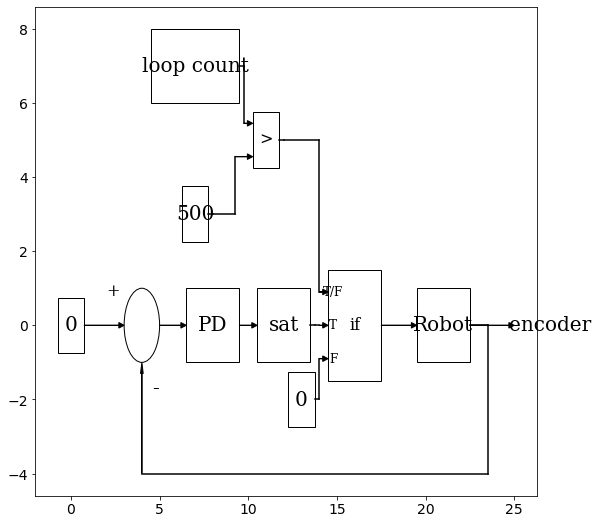

In [99]:
mysys.draw()

In [103]:
mysys.save_model_to_csv("vib_suppress_only_from_notebook.csv")

key_list: ['value']
param_csv_list = ['value:0']
in get_csv_list_for_row: ['int_constant_block', 'U_cl', '0', 'int_constant_block', '', '', '1.5', '1.5', 'absolute', '0', '0', '', '', '', '', '', 'value:0', '', '', '', '', '', '', '', '', '']
key_list: []
param_csv_list = []
in get_csv_list_for_row: ['summing_junction', 'sum1_block', '', 'summing_junction', 'U_cl', 'G_block', '2', '2', 'relative', '', '', 'U_cl', 'right', '4', '0', '0', '', '', '', '', '', '', '', '', '', '']
key_list: ['Kp', 'Kd']
param_csv_list = ['Kp:3', 'Kd:0.1']
in get_csv_list_for_row: ['PD_controller', 'PD_block', 'PD', 'PD_control_block', 'sum1_block', '', '3', '2', 'relative', '', '', 'sum1_block', 'right', '4', '0', '0', 'Kp:3', 'Kd:0.1', '', '', '', '', '', '', '', '']
key_list: []
param_csv_list = []
in get_csv_list_for_row: ['saturation_block', 'sat_block', 'sat', 'saturation_block', 'PD_block', '', '3', '2', 'relative', '', '', 'PD_block', 'right', '4', '0', '0', '', '', '', '', '', '', '', '', '', '']
ke

## Print Blocks

In [100]:
mysys.print_blocks = [lc,sat,gt1,if1,G]

## Execution Order

In [101]:
mysys.find_execution_order([U,lc,const1, const2, gt1])

EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE

in find_execution_order

EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
i = 0, j = 0, N = 2
j = 0, N = 2, curblock = lp_cnt_block


AssertionError: you cannot find the execution order for blocks whose inputs are not set: <py_block_diagram.loop_count_block object at 0x12e07a9d0>

In [46]:
mysys.execution_order

## Codegen Test

In [47]:
msg = "Cart Pendulum Vib Suppress 1"

In [48]:
mysys.welcome_msg = msg

In [49]:
ls *.ino

cart_pendulum_template1_vib_only.ino


In [50]:
template_fn = "cart_pendulum_template1_vib_only.ino"

In [51]:
mysys.generate_arduino_code("cart_pendulum_autogen_1_siso_vib_suppress", template_fn)

block: <py_block_diagram.int_constant_block object at 0x7d45d0f3e9b0>
block: <py_block_diagram.summing_junction object at 0x7d45d0f34748>
block: <py_block_diagram.PD_controller object at 0x7d45d0f250f0>
block: <py_block_diagram.saturation_block object at 0x7d45d0f348d0>
block: <py_block_diagram.if_block object at 0x7d45d0edaf60>
block: <py_block_diagram.int_constant_block object at 0x7d45d0f25ba8>
block: <py_block_diagram.greater_than_block object at 0x7d45d0f179e8>
block: <py_block_diagram.int_constant_block object at 0x7d45d0ea5438>
block: <py_block_diagram.loop_count_block object at 0x7d45d0f17e80>
block: <py_block_diagram.plant object at 0x7d45d0f172e8>
block: <py_block_diagram.output_block object at 0x7d45d0f170b8>
